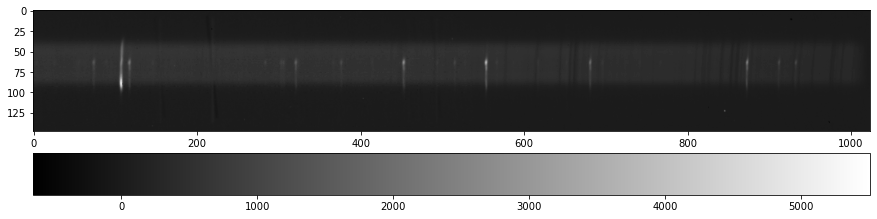

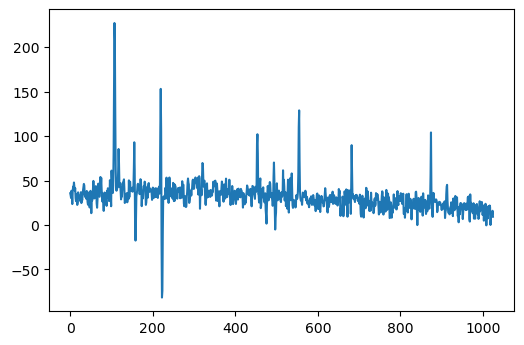

In [27]:
# import packages
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
from lmfit import Model

# path joining version for other paths
notebook_path = os.path.abspath('h3p.ipynb')
filepath = os.path.join(os.path.dirname(notebook_path), '02jun17/spec/order36/')

# count number of fits files in folder
filesize = len([name for name in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, name))])

# load fits data
nirspec7_data = []
for i in range(filesize):
    n = i + 22 # fits index starts from 22
    if n < 100:
        hdu_data = fits.getdata(filepath + 'jun02s00' + '{}_order36.fits'.format(n), ext=0)
        nirspec7_data.append(hdu_data)
    elif n >= 100 and n < 112: # fits index ends at 111
        hdu_data = fits.getdata(filepath + 'jun02s0' + '{}_order36.fits'.format(n), ext=0)
        nirspec7_data.append(hdu_data)
    elif n >= 112:
        break
nirspec7_data_array = np.array(nirspec7_data)

# sky 51, 59; object 52 to 58
data51 = nirspec7_data_array[29] # sky
data59 = nirspec7_data_array[37] # sky
data53 = nirspec7_data_array[31] # object


# object 60 to 103
data60 = nirspec7_data_array[38]

# remove sky background
sky_subtracted = nirspec7_data_array[39] - data51

# show reduced fits
plt.figure(figsize=(15,8))
plt.imshow(sky_subtracted, cmap='gist_gray')
#plt.xlim(80,140)
#plt.ylim(110,100)
plt.colorbar(orientation='horizontal', pad=0.05)

# load waverange
waverange = fits.open(filepath + 'waverange.fits', ignore_missing_end=True)[0].data

# plot cropped slit
pixel = np.linspace(0, 1024, 1024)
selected_slit = sky_subtracted[104]
plt.figure(dpi=100)
plt.plot(pixel, selected_slit)
#plt.xlim(550,560)

# select certain waverange/pixel
#index = np.where((waverange>2.1216) & (waverange<2.12197))
index = np.where((pixel>90)*(pixel<140))

# plot slit with selected waverange/pixel
#plt.figure()
#plt.plot(pixel[index], selected_slit[index],'.')

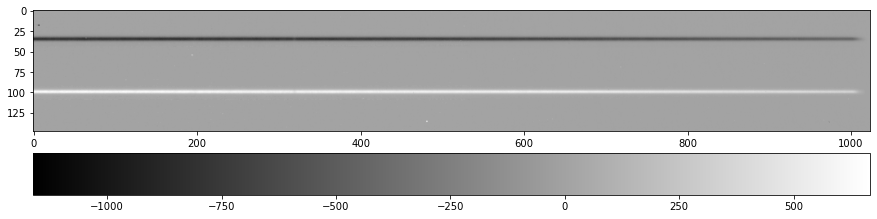

In [39]:
plt.figure(figsize=(15,8))
plt.imshow(nirspec7_data_array[105-22] - nirspec7_data_array[104-22], cmap='gist_gray')
#plt.xlim(80,140)
#plt.ylim(110,100)
plt.colorbar(orientation='horizontal', pad=0.05)

[[Model]]
    Model(gaussian_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 6
    chi-square         = 0.60858992
    reduced chi-square = 5.9783e-04
    Akaike info crit   = -7594.35639
    Bayesian info crit = -7564.76756
[[Variables]]
    a0:  0.69891349 +/- 0.01980194 (2.83%) (init = 1)
    a1:  108.548143 +/- 0.04231852 (0.04%) (init = 107)
    a2:  1.49692168 +/- 0.03275060 (2.19%) (init = 2)
    a3:  0.32136901 +/- 0.00231424 (0.72%) (init = 0.1)
    a4:  9.9834e-05 +/- 1.0377e-05 (10.39%) (init = 0)
    a5: -2.7665e-07 +/- 9.7882e-09 (3.54%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a4, a5) = -0.968
    C(a3, a4) = -0.867
    C(a3, a5) =  0.746
    C(a0, a2) = -0.569


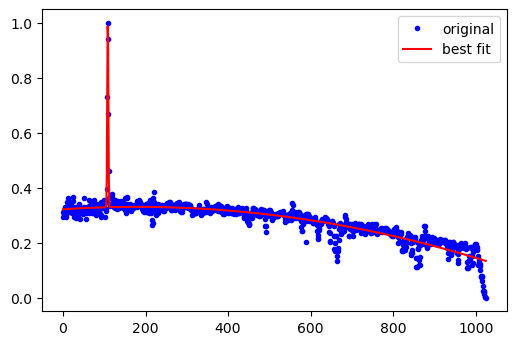

In [16]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

normalized = normalize(selected_slit)
#normalized = normalization(selected_slit[index])
#normalized = normalization(flattened_slit[multi_index])

x = pixel
#x = pixel[index]
#x = multi_pixel[multi_index]
y = normalized

#def gaussian(x, amp, mu, fwhm): 
#    sig = fwhm / (2*np.sqrt(2*np.log(2)))
#    return amp * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# guassian function credit to pen and pants IDL's Gaussfit in Python
def gaussian_fit(x, a0, a1, a2, a3, a4, a5): 
    """
    x = data array
    a0 = height of guassian
    a1 = pixel position of Gaussian peak
    a2 = width of Gaussian
    a3 = constant term
    a4 = linear term
    a5 = quadratic term
    
    note: fwhm = a2 * np.sqrt(2 * np.log(2)) * 2
    """
    z = (x - a1) / a2
    y = a0 * np.exp(-z**2 / a2) + a3 + a4 * x + a5 * x**2
    return y


gmodel = Model(gaussian_fit)
#gmodel = Model(gaussian_fit, prefix='g1_') + Model(gaussian_fit, prefix='g2_')
#print('parameter names: {}'.format(gmodel.param_names))
#print('independent variables: {}'.format(gmodel.independent_vars))

params = gmodel.make_params(a0=1, a1=107, a2=2, a3=0.1, a4=0, a5=0)
#params = gmodel.make_params(g1_a0=1.0, g1_a1=107, g1_a2=2, g1_a3=0.1, g1_a4=0, g1_a5=0,
#                            g2_a0=0.3, g2_a1=554, g2_a2=2, g2_a3=0.1, g2_a4=0, g2_a5=0)
result = gmodel.fit(y, params, x=x)

print(result.fit_report())

plt.figure(dpi=100)
#plt.plot(pixel[index], normalized, 'g-', label='original curve')
plt.plot(x, y,'b.', label='original')
#plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
#plt.xlim(550, 580)
plt.legend(loc='best')
plt.show()

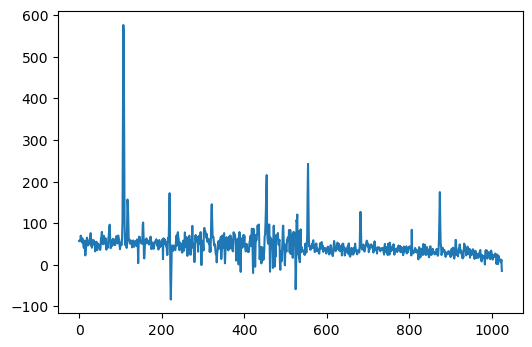

In [17]:
# plot cropped slit
pixel = np.linspace(0, 1024, 1024)
selected_slit = sky_subtracted[100]
plt.figure(dpi=100)
plt.plot(pixel, selected_slit)
#plt.xlim(550,560)

[0.28782686 0.28788731 0.28794732 ... 0.11940585 0.11901504 0.11862379]

0.7068878712986884
[0.3014051  0.30147744 0.3015493  ... 0.12426736 0.12384755 0.12342725]

0.7082434459594041
[0.32155444 0.32163133 0.32170772 ... 0.13339371 0.13294772 0.13250122]

0.7060878636536114
[0.32383328 0.32392933 0.32402482 ... 0.13385621 0.13338748 0.13291819]

0.7187695718577986
[0.32323393 0.32331966 0.32340487 ... 0.13425622 0.13379977 0.13334279]

0.7060091585438693
[0.32136901 0.32146866 0.32156776 ... 0.13444497 0.1339786  0.13351168]

0.6989134893730254


array([0.70688787, 0.70824345, 0.70608786, 0.71876957, 0.70600916,
       0.69891349])

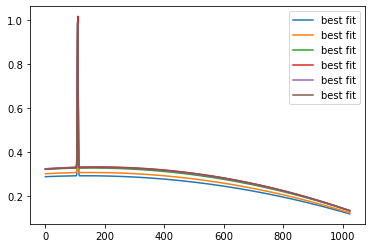

In [18]:
# guassian function credit to pen and pants IDL's Gaussfit in Python
def gaussian_fit(x, a0, a1, a2, a3, a4, a5): 
    """
    x = data array
    a0 = height of guassian
    a1 = pixel position of Gaussian peak
    a2 = width of Gaussian
    a3 = constant term
    a4 = linear term
    a5 = quadratic term
    
    note: fwhm = a2 * np.sqrt(2 * np.log(2)) * 2
    """
    z = (x - a1) / a2
    y = a0 * np.exp(-z**2 / a2) + a3 + a4 * x + a5 * x**2
    return y


gmodel = Model(gaussian_fit)
#gmodel = Model(gaussian_fit, prefix='g1_') + Model(gaussian_fit, prefix='g2_')
#print('parameter names: {}'.format(gmodel.param_names))
#print('independent variables: {}'.format(gmodel.independent_vars))

params = gmodel.make_params(a0=1, a1=107, a2=2, a3=0.1, a4=0, a5=0)
#params = gmodel.make_params(g1_a0=1.0, g1_a1=107, g1_a2=2, g1_a3=0.1, g1_a4=0, g1_a5=0,
#                            g2_a0=0.3, g2_a1=554, g2_a2=2, g2_a3=0.1, g2_a4=0, g2_a5=0)
#result = gmodel.fit(y, params, x=x)

#print(result.fit_report())

#plt.figure(dpi=100)
#plt.plot(pixel[index], normalized, 'g-', label='original curve')
#plt.plot(x, y,'b.', label='original')
#plt.plot(x, result.init_fit, 'k--', label='initial fit')
#plt.plot(x, result.best_fit, 'r-', label='best fit')
#plt.xlim(550, 580)
#plt.legend(loc='best')
#plt.show()
x = pixel

a0_all = []
for i in range(61):
    new_slit = sky_subtracted[i+40]
    y = normalize(new_slit)
    new_result = gmodel.fit(y, params, x=x)
    plt.plot(x, new_result.best_fit, label='best fit')
    plt.legend()
    print(new_result.best_fit)
    print()
    print(new_result.best_values.get('a0'))
    a0_all.append(new_result.best_values.get('a0'))
np.array(a0_all)

In [19]:
new_result.best_values.get('a0')

0.6989134893730254

In [14]:
new_result.params

name,value,standard error,relative error,initial value,min,max,vary
a0,0.71876957,0.02113510,(2.94%),1,-inf,inf,True
a1,108.712812,0.04364608,(0.04%),107,-inf,inf,True
a2,1.49074690,0.03384727,(2.27%),2,-inf,inf,True
a3,0.32383328,0.00246215,(0.76%),0.1,-inf,inf,True
a4,9.6227e-05,1.1041e-05,(11.47%),0,-inf,inf,True
a5,-2.7604e-07,1.0414e-08,(3.77%),0,-inf,inf,True


In [103]:
print(new_result.fit_report())

[[Model]]
    Model(gaussian_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1024
    # variables        = 6
    chi-square         = 0.68899554
    reduced chi-square = 6.7681e-04
    Akaike info crit   = -7467.28811
    Bayesian info crit = -7437.69928
[[Variables]]
    a0:  0.71876957 +/- 0.02113510 (2.94%) (init = 1)
    a1:  108.712812 +/- 0.04364608 (0.04%) (init = 107)
    a2:  1.49074690 +/- 0.03384727 (2.27%) (init = 2)
    a3:  0.32383328 +/- 0.00246215 (0.76%) (init = 0.1)
    a4:  9.6227e-05 +/- 1.1041e-05 (11.47%) (init = 0)
    a5: -2.7604e-07 +/- 1.0414e-08 (3.77%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a4, a5) = -0.968
    C(a3, a4) = -0.867
    C(a3, a5) =  0.746
    C(a0, a2) = -0.569


In [66]:
sky_subtracted[100]

array([ 57.335304 ,  56.122307 ,  57.503994 , ...,   5.8862534,
        12.195339 , -14.815922 ], dtype=float32)

# plot more slits
multi_slit = subtracted[45:80,]
multi_pixel = np.linspace(0, 1024, 1024*len(multi_slit))
flattened_slit = np.ravel(multi_slit.T)

plt.figure()
plt.plot(multi_pixel, flattened_slit, '.')

multi_index = np.where((multi_pixel>100)*(multi_pixel<113))

plt.figure()
plt.plot(multi_pixel[multi_index], flattened_slit[multi_index],'.')

for n in range(224): #We use this list to create a list which holds all the data from Order19
    num = n + 76
    if num < 100:
        image_filei = 'D:/Python work/Keck 05Sept06 Data/Keck 05Sept06 Data/05Sep06 Observations/uranus/order19/05sep06_00' + str(num) + '.fits'
        fits.open(image_filei)
        image_datai = fits.getdata(image_filei, ext=0)
        Keck_Data.append(image_datai)
    elif num < 192 and num >= 100:
        image_filei = 'D:/Python work/Keck 05Sept06 Data/Keck 05Sept06 Data/05Sep06 Observations/uranus/order19/05sep06_0' + str(num) + '.fits'
        fits.open(image_filei)
        image_datai = fits.getdata(image_filei, ext=0)
        Keck_Data.append(image_datai)
    elif num >= 192 and num < 196:
        print('Star files')
    elif num >= 196 and num < 296:
        image_filei = 'D:/Python work/Keck 05Sept06 Data/Keck 05Sept06 Data/05Sep06 Observations/uranus/order19/05sep06_0' + str(num) + '.fits'
        fits.open(image_filei)
        image_datai = fits.getdata(image_filei, ext=0)
        Keck_Data.append(image_datai)
    else:
        print('Galaxy files')

notebook_path = os.path.abspath('h3p.ipynb')
filepath = os.path.join(os.path.dirname(notebook_path), '02jun17/spec/order36/')


hdu_list1 = fits.open(filepath + 'jun02s0043_order36.fits', ignore_missing_end=True)
hdu_list2 = fits.open(filepath + 'jun02s0044_order36.fits', ignore_missing_end=True)
hdu_list3 = fits.open(filepath + 'jun02s0045_order36.fits', ignore_missing_end=True)
hdu_list4 = fits.open(filepath + 'jun02s0046_order36.fits', ignore_missing_end=True)

hdu_list5 = fits.open(filepath + 'jun02s0047_order36.fits', ignore_missing_end=True)
hdu_list6 = fits.open(filepath + 'jun02s0048_order36.fits', ignore_missing_end=True)
hdu_list7 = fits.open(filepath + 'jun02s0049_order36.fits', ignore_missing_end=True)
hdu_list8 = fits.open(filepath + 'jun02s0050_order36.fits', ignore_missing_end=True)


data1 = hdu_list1[0].data
data2 = hdu_list2[0].data
data3 = hdu_list3[0].data
data4 = hdu_list4[0].data

data5 = hdu_list5[0].data
data6 = hdu_list6[0].data
data7 = hdu_list7[0].data
data8 = hdu_list8[0].data

sum_A = data1 + data4 + data5 + data8
sum_B = data2 + data3 + data6 + data7

plt.figure(figsize=(8,8))
plt.imshow(sum_B - sum_A)
plt.colorbar()

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.figure(figsize=(10,8))
ax = plt.gca()
im = ax.imshow(data53 - data51)

#### create an axes on the right side of ax. The width of cax will be 5%
#### of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)